This program will identify objects in the fashion pictures.


In [2]:
#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The csv files are too big to send to github, so it is not uploaded to github.  You can get these files from 
https://www.superdatascience.com/pages/machine-learning-practical

In [3]:
df_train=pd.read_csv('../data/fashion-mnist_train.csv')
df_test=pd.read_csv('../data/fashion-mnist_test.csv')

In [5]:

df_test.head()
df_test.tail()
df_train.head()
df_train.tail()
df_train.shape
df_test.shape
df_train.describe()
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data frame shows the first column (0) is the label from 0-9?  and column 1 to col 784 are the 28x28 pixels


In [6]:
training = np.array(df_train, dtype='float32')
testing = np.array(df_test, dtype='float32')
#training = np.array(df_train)
training[0:1,0]
type(training[0][0])
type(testing[0][0])

numpy.float32

0.0 11608


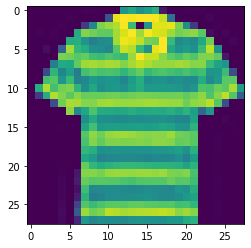

In [7]:
# display some sample data as picture
import random 
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
print(training[i,0], i)


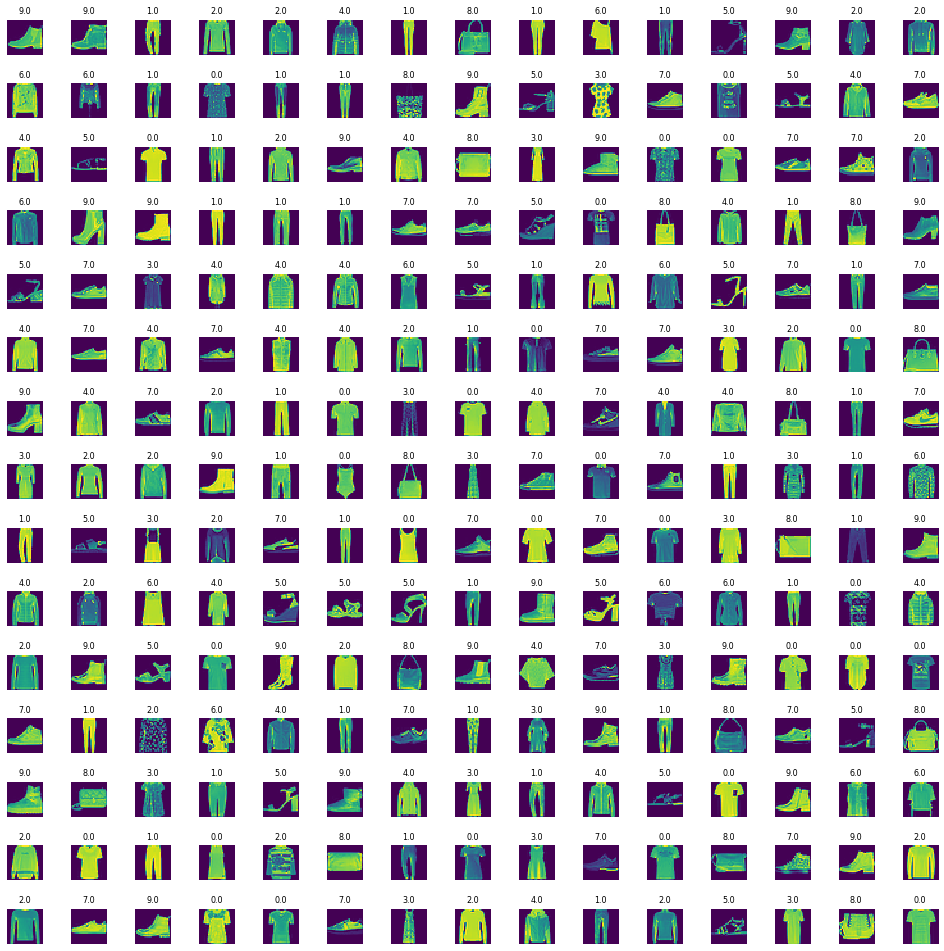

In [8]:
# create subplots
W_grid=15
L_grid=15

fig, axes= plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel()         # Flatten the 15x15 matrix into 225 array
n_training=len(training)    # Get the number of traing record
for i in np.arange(0, W_grid * L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.8)

In [9]:
type(axes)

numpy.ndarray

In [10]:
#Train The Model
X_train = training[:, 1:]/255    # normalize 
y_train = training[:, 0]
X_test = testing[:, 1:]/255    # normalize 
y_test = testing[:, 0]
X_train.shape

(60000, 784)

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)
print(len(X_train))
print(X_train.shape)
print(X_train.shape[0])

48000
(48000, 784)
48000


In [12]:
X_train_28= X_train.reshape(X_train.shape[0],*(28, 28, 1))
X_test_28 = X_test.reshape(X_test.shape[0],*(28, 28, 1))
X_validate_28= X_validate.reshape(X_validate.shape[0],*(28, 28, 1))

In [13]:
print(X_train_28.shape)
print(y_train.shape)
print(X_test_28.shape)
print(X_validate_28.shape)
print(y_validate.shape)


(48000, 28, 28, 1)
(48000,)
(10000, 28, 28, 1)
(12000, 28, 28, 1)
(12000,)


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



Using TensorFlow backend.


In [59]:
# create a CNN model
cnn_model = Sequential()

# Add kernels. 32 Kernels with size 3x3. activiation function is relu.
#cnn_model.add(Conv2D(32,(3,3),input_shape=(28,28,1), activation= 'relu'))   
cnn_model.add(Conv2D(64,(3,3),input_shape=(28,28,1), activation= 'relu'))

# Add MaxPooling
cnn_model.add(MaxPooling2D(pool_size=(2,2))) 

# Add Flatten
cnn_model.add(Flatten())   

# Add Dense
cnn_model.add(Dense(output_dim=32, activation = 'relu') )

# Add Another Dense with sigma as activation function
cnn_model.add(Dense(output_dim=10, activation = 'sigmoid') )

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  from ipykernel import kernelapp as app
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`


In [60]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                346144    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 347,114
Trainable params: 347,114
Non-trainable params: 0
_________________________________________________________________


In [61]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [62]:
epochs=50
cnn_model.fit(X_train_28, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1,  
              validation_data=(X_validate_28, y_validate))

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 17s 348us/step - loss: 0.8730 - accuracy: 0.6696 - val_loss: 0.4841 - val_accuracy: 0.8252
Epoch 2/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.4600 - accuracy: 0.8353 - val_loss: 0.4355 - val_accuracy: 0.8480
Epoch 3/50
48000/48000 [==============================] - 23s 475us/step - loss: 0.4103 - accuracy: 0.8550 - val_loss: 0.3925 - val_accuracy: 0.8602
Epoch 4/50
48000/48000 [==============================] - 22s 450us/step - loss: 0.3803 - accuracy: 0.8673 - val_loss: 0.3838 - val_accuracy: 0.8644
Epoch 5/50
48000/48000 [==============================] - 18s 376us/step - loss: 0.3560 - accuracy: 0.8761 - val_loss: 0.3618 - val_accuracy: 0.8741
Epoch 6/50
48000/48000 [==============================] - 15s 317us/step - loss: 0.3406 - accuracy: 0.8822 - val_loss: 0.3335 - val_accuracy: 0.8872
Epoch 7/50
48000/48000 [==============================] 

In [21]:
evaluation = cnn_model.evaluate(X_test_28, y_test)
print("Test Accuracy : {:.3f}".format(evaluation[1]))

10000/10000 [==============================] - 1s 103us/step
Test Accuracy : 0.912


In [33]:
predicted_classes=cnn_model.predict_classes(X_test_28)

In [49]:
print("Predict Classes : {}".format(predicted_classes))
predicted_classes[10]
X_test.shape


print(X_test.shape)
X_test_28.shape
X_test_28[5].reshape(28,28)

Predict Classes : [0 1 2 ... 8 8 1]
(10000, 784)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.17254902, 0.4117647 , 0.17254902, 0.03921569, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13333334, 0.26666668, 0.13333334, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.13333334,
        0.53333336, 0.4       , 0.4117647 , 0.38431373, 0.2901961 ,
        0.2509804 , 0.13333334, 0.10588235, 0.07843138, 0.05098039,
        0.07843138, 0.10588235, 0.18431373, 0.2784314 , 0.33333334,
        0.33333334, 0.35686275, 0.53333336, 0.10588235, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.4       ,
        0.46666667, 0.2901961 , 0.35686275, 0.31764707, 0.37254903,
        0.37254903, 0.34509805, 0.37254903, 0.34509805, 0.30588236,
        0.30588236, 0.3176

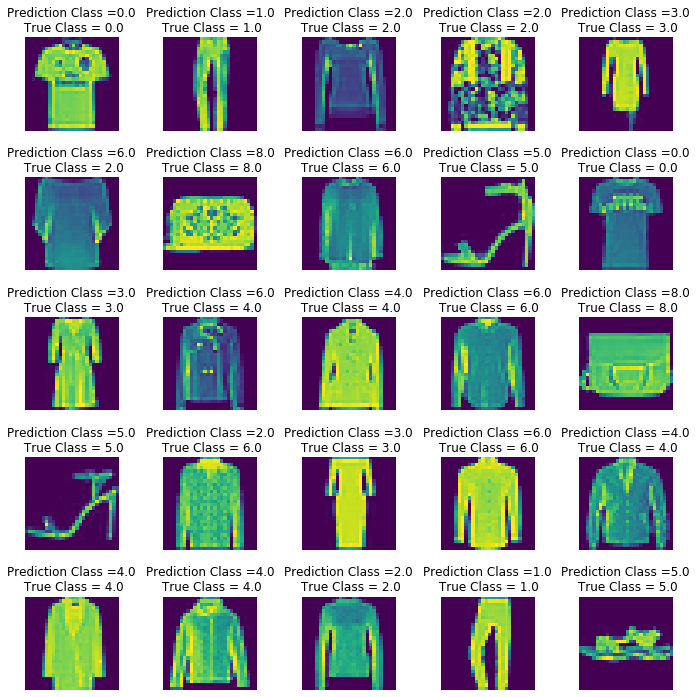

In [51]:
# create subplots
W=5
L=5

fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()         # Flatten the 12x12 matrix 144 array


for i in np.arange(0, W * L):
    axes[i].imshow(X_test_28[i].reshape(28,28))
    axes[i].set_title("Prediction Class ={:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

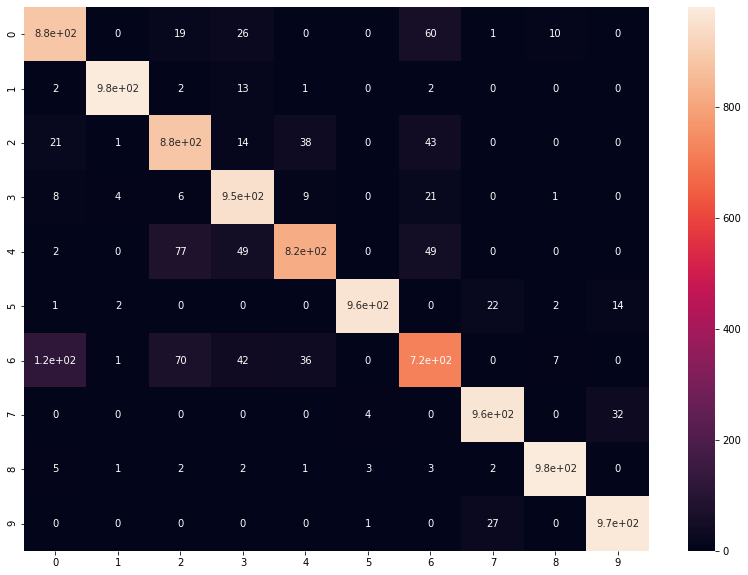

In [53]:
# Run confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)
#sum the diagonal element to get the total true correct values


In [58]:
# classification report

from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))


target_names[3]

              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.86      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.83      0.88      0.86      1000
     Class 3       0.87      0.95      0.91      1000
     Class 4       0.91      0.82      0.86      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.80      0.72      0.76      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



'Class 3'